# My name is Shreenidhi Hipparagi

# A Happy Customer Bank is a mid sized private bank and is trying cross sell its credit card.

## Objective:- Identifying customers who could show intent in buying the recommended credit card

### Import the libraries required for solving the problem

In [1]:
import numpy as np #numerical computation 
import pandas as pd #data manipulation 
import seaborn as sns #data visualization 
import matplotlib.pyplot as plt #data visualization
print("Setup Completed")

Setup Completed


In [2]:
train_data=pd.read_csv("train_s3TEQDk.csv")
print("training dataset imported")


training dataset imported


# After importing/reading dataset lets check if the dataset is correctly imported or not by check few rows of the dataset

In [3]:
train_data.head() # top 5 rows of the dataset

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [4]:
test_data=pd.read_csv("test_mSzZ8RL.csv")
print("test dataset imported")

test dataset imported


In [5]:
test_data.head() # top 5 rows of the dataset

ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO    Male   29       RG254      Other           X1       25   
1  CCMEWNKY    Male   43       RG268      Other           X2       49   
2  VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3  TT8RPZVC    Male   29       RG272      Other           X1       33   
4  SHQZEYTZ  Female   29       RG270      Other           X1       19   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1            NaN               925537        No  
2             No               215949        No  
3             No               868070        No  
4             No               657087        No

# Is_Lead is the target variable 

### Lets check if there are any null values in train and test dataset and also checking the information and summary 

In [6]:
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

# 29325 missing values in Credit_Product column

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
train_data['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

# If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.) No is the majority 

In [9]:
test_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

# 12522 values are missing in Credit_Product

In [10]:
test_data['Credit_Product'].value_counts(),test_data['Credit_Product'].nunique()

(No     61608
 Yes    31182
 Name: Credit_Product, dtype: int64,
 2)

In [11]:
test_data['Credit_Product']=np.where(test_data['Credit_Product'].isnull(),"Unknown",test_data['Credit_Product'])
test_data.head()

ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO    Male   29       RG254      Other           X1       25   
1  CCMEWNKY    Male   43       RG268      Other           X2       49   
2  VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3  TT8RPZVC    Male   29       RG272      Other           X1       33   
4  SHQZEYTZ  Female   29       RG270      Other           X1       19   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1        Unknown               925537        No  
2             No               215949        No  
3             No               868070        No  
4             No               657087        No

In [12]:
train_data['Credit_Product']=np.where(train_data['Credit_Product'].isnull(),"Unknown",train_data['Credit_Product'])
train_data.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

# I have replaced NaN values in Credit_Product with Unknown

In [13]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               -

(None, None)

In [14]:
id_col=test_data['ID'] #preserving ID column to merge this column to the result of the model 
id_col

0         VBENBARO
1         CCMEWNKY
2         VK3KGA9M
3         TT8RPZVC
4         SHQZEYTZ
            ...   
105307    DBENJOYI
105308    CWQ72DWS
105309    HDESC8GU
105310    2PW4SFCA
105311    F2NOYPPZ
Name: ID, Length: 105312, dtype: object

In [15]:
train_data=train_data.drop('ID',axis=1)
test_data=test_data.drop('ID',axis=1)

# Lets visualize

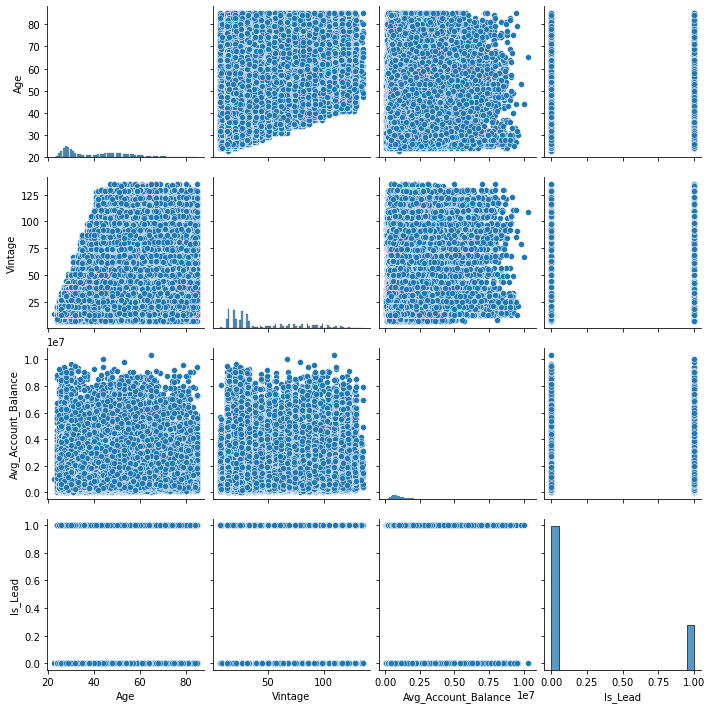

In [16]:
sns.pairplot(train_data)

# Lets convert the object data type into numericals using Label Encoder

In [17]:
train_data['Region_Code'].unique(),test_data['Region_Code'].unique()

(array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
        'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
        'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
        'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
        'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
       dtype=object),
 array(['RG254', 'RG268', 'RG270', 'RG272', 'RG253', 'RG257', 'RG284',
        'RG283', 'RG277', 'RG273', 'RG261', 'RG280', 'RG274', 'RG278',
        'RG269', 'RG281', 'RG251', 'RG252', 'RG279', 'RG282', 'RG262',
        'RG263', 'RG264', 'RG256', 'RG265', 'RG260', 'RG258', 'RG271',
        'RG250', 'RG275', 'RG276', 'RG267', 'RG255', 'RG259', 'RG266'],
       dtype=object))

In [18]:
train_data['Occupation'].unique(),test_data['Occupation'].unique()

(array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object),
 array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object))

In [19]:
train_data['Channel_Code'].unique(),test_data['Channel_Code'].unique()

(array(['X3', 'X1', 'X2', 'X4'], dtype=object),
 array(['X1', 'X2', 'X3', 'X4'], dtype=object))

In [20]:
train_data['Credit_Product'].unique(),test_data['Credit_Product'].unique()

(array(['No', 'Unknown', 'Yes'], dtype=object),
 array(['Yes', 'Unknown', 'No'], dtype=object))

In [21]:
test_data.head(10)

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0    Male   29       RG254          Other           X1       25   
1    Male   43       RG268          Other           X2       49   
2    Male   31       RG270       Salaried           X1       14   
3    Male   29       RG272          Other           X1       33   
4  Female   29       RG270          Other           X1       19   
5    Male   60       RG268  Self_Employed           X3      110   
6  Female   69       RG253          Other           X2       67   
7  Female   30       RG257       Salaried           X1       33   
8    Male   43       RG284       Salaried           X3       81   
9  Female   54       RG283  Self_Employed           X2       37   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1        Unknown               925537        No  
2             No               215949        No  
3             No               868070        No  
4             No               657087        No  
5             No              4624262        No  
6             No              1032764        No  
7             No               837009        No  
8        Unknown              1001232       Yes  
9            Yes              1667851        No

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Gender']=le.fit_transform(train_data['Gender'])
train_data['Region_Code']=le.fit_transform(train_data['Region_Code'])
train_data['Channel_Code']=le.fit_transform(train_data['Channel_Code'])
train_data['Credit_Product']=le.fit_transform(train_data['Credit_Product'])
train_data['Is_Active']=le.fit_transform(train_data['Is_Active'])

test_data['Gender']=le.fit_transform(test_data['Gender'])
test_data['Region_Code']=le.fit_transform(test_data['Region_Code'])
test_data['Channel_Code']=le.fit_transform(test_data['Channel_Code'])
test_data['Credit_Product']=le.fit_transform(test_data['Credit_Product'])
test_data['Is_Active']=le.fit_transform(test_data['Is_Active'])



In [23]:
train_data['Occupation']=le.fit_transform(train_data['Occupation'])
test_data['Occupation']=le.fit_transform(test_data['Occupation'])

# Gender
## 0 for female, 1 for male

# Occupation
## 0 for Entrepreneur, 1 for Other , 2 for Salaried and 3 for Self_Employed

# Channel_Code
## 0 for X1, 1 for X2, 2 for X3, 3 for X4

# Credit_Product
## 0 for No, 1 for Unknown, 2 for Yes

# Is_active
## 0 for No, 1 for Yes

In [24]:
test_data.head(10)

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       1   29            4           1             0       25   
1       1   43           18           1             1       49   
2       1   31           20           2             0       14   
3       1   29           22           1             0       33   
4       0   29           20           1             0       19   
5       1   60           18           3             2      110   
6       0   69            3           1             1       67   
7       0   30            7           2             0       33   
8       1   43           34           2             2       81   
9       0   54           33           3             1       37   

   Credit_Product  Avg_Account_Balance  Is_Active  
0               2               742366          0  
1               1               925537          0  
2               0               215949          0  
3               0               868070          0  
4               0               657087          0  
5               0              4624262          0  
6               0              1032764          0  
7               0               837009          0  
8               1              1001232          1  
9               2              1667851          0

In [25]:
test_data.shape

(105312, 9)

In [26]:
train_data.shape

(245725, 10)

In [27]:
x=train_data[['Gender','Age','Region_Code','Occupation','Channel_Code','Vintage','Credit_Product','Avg_Account_Balance','Is_Active']]
y=train_data[['Is_Lead']]

# Lets split the data for training

In [28]:
train_data['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

## The dataset is highly imbalanced, more 0's 

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=7)

In [30]:
x_train.shape,x_test.shape

((159721, 9), (86004, 9))

In [31]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

F:\ana\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [32]:
ypred=lr.predict(x_test)


In [33]:
from sklearn.metrics import roc_auc_score
a=roc_auc_score(y_test,ypred)
print("The roc_auc_score is {}".format(a))

The roc_auc_score is 0.5


In [34]:
from xgboost import XGBClassifier
xgc=XGBClassifier(learning_rate=0.097,n_estimators=100)
xgc.fit(x_train,y_train)

F:\ana\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\ana\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[20:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.097, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
ypred3=xgc.predict(x_test)

In [36]:
roc_auc_score(ypred3,y_test)

0.8340372968068475

# Combining ID and the values predicted into one dataframe 

In [37]:
final=xgc.predict(test_data)

In [39]:
final=pd.DataFrame(final,columns=['Is_Lead'])

In [40]:
yfinal=pd.concat([id_col,final],axis=1)
yfinal

ID  Is_Lead
0       VBENBARO        0
1       CCMEWNKY        1
2       VK3KGA9M        0
3       TT8RPZVC        0
4       SHQZEYTZ        0
...          ...      ...
105307  DBENJOYI        1
105308  CWQ72DWS        1
105309  HDESC8GU        0
105310  2PW4SFCA        0
105311  F2NOYPPZ        0

[105312 rows x 2 columns]

In [43]:
yfinal.to_csv("Final.csv")

Index(['ID', 'Is_Lead'], dtype='object')